In [3]:
import os
os.getcwd()

'C:\\Users\\Admin\\Downloads'

In [4]:
os.chdir('C:\\Users\\Admin\\Desktop\\to print out\\simple linear regression')

In [5]:
os.getcwd()

'C:\\Users\\Admin\\Desktop\\to print out\\simple linear regression'

In [6]:
# For reading data set
# importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# reading a csv file using pandas library
wcat=pd.read_csv("wc-at.csv")
wcat.columns

Index([u'Waist', u'AT'], dtype='object')

In [10]:
wcat.shape

(109, 2)

In [11]:
wcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
Waist    109 non-null float64
AT       109 non-null float64
dtypes: float64(2)
memory usage: 1.8 KB


In [15]:
wcat.head(3)

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60


In [16]:
wcat.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


(array([ 2.,  9., 19., 17., 11.,  9., 13., 21.,  5.,  3.]),
 array([ 63.5 ,  69.25,  75.  ,  80.75,  86.5 ,  92.25,  98.  , 103.75,
        109.5 , 115.25, 121.  ]),
 <a list of 10 Patch objects>)

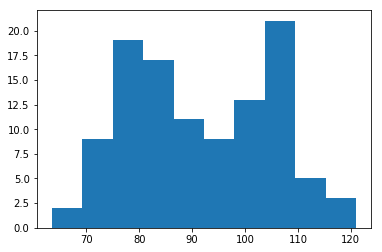

In [8]:
plt.hist(wcat.Waist)

{'boxes': [<matplotlib.lines.Line2D at 0x9adc940>],
 'caps': [<matplotlib.lines.Line2D at 0x9aec128>,
 'fliers': [<matplotlib.lines.Line2D at 0x9aecba8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x9aec828>],
 'whiskers': [<matplotlib.lines.Line2D at 0x9adc9e8>,
  <matplotlib.lines.Line2D at 0x9adcd68>]}

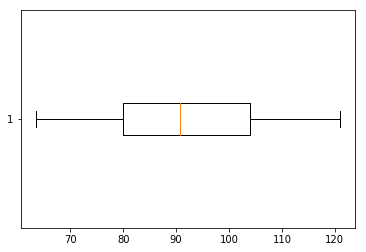

In [9]:
plt.boxplot(wcat.Waist,0,"rs",0)

(array([14., 18., 16., 13., 17., 14.,  4.,  6.,  3.,  4.]),
 array([ 11.44 ,  35.596,  59.752,  83.908, 108.064, 132.22 , 156.376,
        180.532, 204.688, 228.844, 253.   ]),
 <a list of 10 Patch objects>)

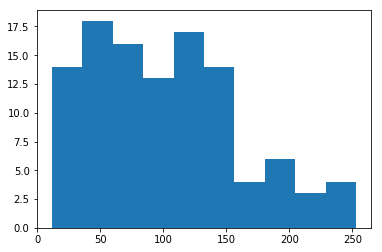

In [17]:
plt.hist(wcat.AT)

{'boxes': [<matplotlib.lines.Line2D at 0xa0845f8>],
 'caps': [<matplotlib.lines.Line2D at 0xa084da0>,
 'fliers': [<matplotlib.lines.Line2D at 0xa066b70>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xa0664e0>],
 'whiskers': [<matplotlib.lines.Line2D at 0xa0846a0>,
  <matplotlib.lines.Line2D at 0xa084a20>]}

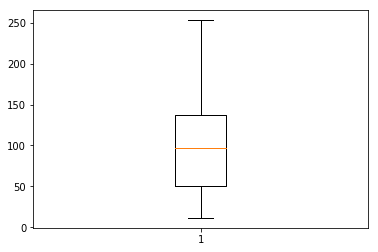

In [18]:
plt.boxplot(wcat.AT)

Text(0,0.5,'AT')

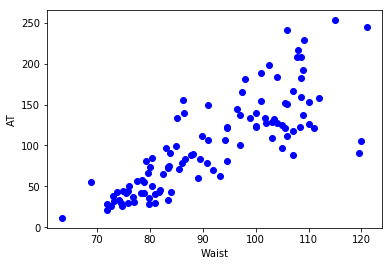

In [19]:
Scatter plot
plt.plot(wcat.Waist,wcat.AT,"bo");plt.xlabel("Waist");plt.ylabel("AT")

In [20]:
#correlation
wcat.AT.corr(wcat.Waist) # # correlation value between X and Y

0.8185578128958532

In [21]:
#numpy package to determine coefficient
np.corrcoef(wcat.AT,wcat.Waist)

array([[1.        , 0.81855781],
       [0.81855781, 1.        ]])

In [22]:
# For preparing linear regression model we need to import the statsmodels.formula.api
import statsmodels.formula.api as smf
model=smf.ols("AT~Waist",data=wcat).fit()

In [23]:
# For getting coefficients of the varibles used in equation
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [24]:
# P-values for the variables and R-squared value for prepared model
#The p-value is calculated based on the observed data and the null hypothesis. It represents the probability of obtaining results as extreme as the observed results under the assumption that the null hypothesis is true.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           1.62e-27
Time:                        14:06:03   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,-259.190053,-172.772923
Waist,2.993689,3.924030


In [26]:
pred = model.predict(wcat.iloc[:,0]) # Predicted values of AT using the model

Text(0,0.5,'ADIPOSE TISSUE')

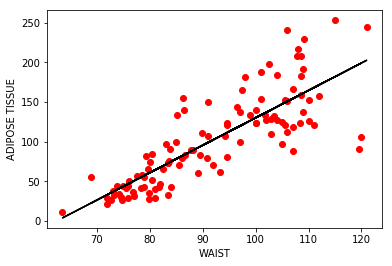

In [28]:
# Visualization of regresion line over the scatter plot of Waist and AT
# For visualization we need to import matplotlib.pyplot
import matplotlib.pylab as plt
plt.scatter(x=wcat['Waist'],y=wcat['AT'], color='red');
plt.plot(wcat['Waist'],pred, color='black');
plt.xlabel('WAIST'); plt.ylabel('ADIPOSE TISSUE')

In [29]:
pred.corr(wcat.AT) # 0.81

0.8185578128958536

In [31]:
pred.head(3)

0    42.568252
1    35.131704
2    66.953210
dtype: float64

# Transforming data to improve predictions

In [32]:
#model2
# Transforming variables for accuracy
model2 = smf.ols('AT~np.log(Waist)',data=wcat).fit()

In [33]:
model2.params

Intercept       -1328.341989
np.log(Waist)     317.135564
dtype: float64

In [34]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           6.80e-28
Time:                        14:15:35   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
print(model2.conf_int(0.01)) # 99% confidence level

                         0            1
Intercept     -1579.905632 -1076.778346
np.log(Waist)   261.384641   372.886487


In [36]:
pred2 = model2.predict(pd.DataFrame(wcat['Waist']))

In [37]:
pred2.head(3)

0    39.828156
1    30.572779
2    68.410960
dtype: float64

In [38]:
pred2.corr(wcat.AT)

0.8217781862645355

Text(0,0.5,'TISSUE')

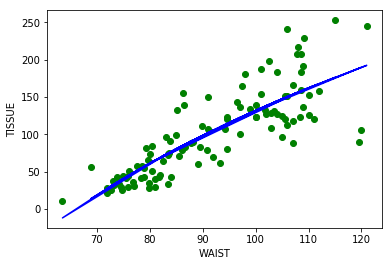

In [39]:
# pred2 = model2.predict(wcat.iloc[:,0])
plt.scatter(x=wcat['Waist'],y=wcat['AT'],color='green');plt.plot(wcat['Waist'],pred2,color='blue');plt.xlabel('WAIST');plt.ylabel('TISSUE')

In [40]:
#model3 
# Exponential transformation
model3 = smf.ols('np.log(AT)~Waist',data=wcat).fit()

In [41]:
model3.params

Intercept    0.741021
Waist        0.040252
dtype: float64

In [42]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           2.68e-30
Time:                        14:28:15   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
print(model3.conf_int(0.01)) # 99% confidence level

                  0         1
Intercept  0.130939  1.351102
Waist      0.033684  0.046820


In [44]:
pred_log = model3.predict(pd.DataFrame(wcat['Waist']))

In [45]:
pred_log.head(3) # as we have used log(AT) in preparing model so we need to convert it back

0    3.749889
1    3.663346
2    4.033669
dtype: float64

In [46]:
pred3=np.exp(pred_log)  # as we have used log(AT) in preparing model so we need to convert it back

In [47]:
pred3.head(3)

0    42.516361
1    38.991601
2    56.467684
dtype: float64

In [48]:
pred3.head(3)

0    42.516361
1    38.991601
2    56.467684
dtype: float64

In [49]:
pred3.corr(wcat.AT)

0.7633804583650529

Text(0,0.5,'TISSUE')

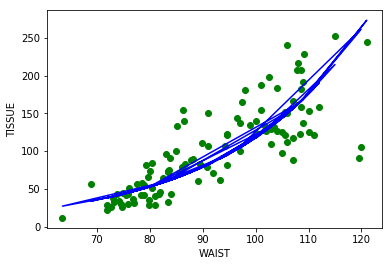

In [50]:
plt.scatter(x=wcat['Waist'],y=wcat['AT'],color='green');plt.plot(wcat.Waist,np.exp(pred_log),color='blue');plt.xlabel('WAIST');plt.ylabel('TISSUE')

In [51]:
resid_3 = pred3-wcat.AT

In [52]:
resid_3.head(3)

0    16.796361
1    13.101601
2    13.867684
dtype: float64

In [53]:
# so we will consider the model having highest R-Squared value which is the log transformation - model3
# getting residuals of the entire data set
student_resid = model3.resid_pearson

In [55]:
student_resid

array([-1.42426841, -1.16036536, -0.79857367, -1.03053611, -0.99183029,
       -1.57770329, -1.77782943, -1.7063649 , -2.43678253, -0.60898882,
       -0.82630708,  0.05965107, -0.11441073, -0.48719133, -1.15546702,
        1.44239166, -0.05388192, -0.61457662,  0.16338349, -1.18519137,
       -0.66413371, -0.85671265, -1.10408983, -0.66788034, -0.61366891,
       -0.53854217,  0.559278  ,  1.28377825,  0.46848176,  0.30798929,
        0.51662718,  0.58049434, -0.07722426,  0.24329581, -0.00731172,
        0.71101855,  0.76180321, -0.07709724,  0.97229834,  0.26937281,
        0.53880043,  0.34505495, -0.14698466,  2.03681962,  1.38280011,
       -0.79731502,  0.38539598,  0.75747349,  0.67811133,  1.31762395,
        1.00267879,  1.11566466,  2.03975207, -0.12692781, -0.4705888 ,
        0.44867784,  0.60008028,  2.34805258,  0.21771996,  0.59055788,
        0.50813615,  1.25820146, -1.76365553, -0.81659309, -2.97779536,
       -2.56121918,  0.97601914, -0.5436722 , -1.10931613,  0.18

Text(0,0.5,'Standardized Residual')

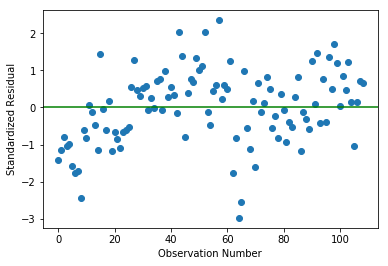

In [56]:

plt.plot(model3.resid_pearson,'o');plt.axhline(y=0,color='green');plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")


Text(0,0.5,'Actual')

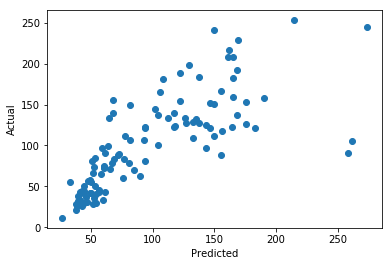

In [57]:
# Predicted vs actual values
plt.scatter(x=pred3,y=wcat.AT);plt.xlabel("Predicted");plt.ylabel("Actual")

In [69]:
#Model4
# Quadratic model
wcat["Waist_Sq"] = wcat.Waist*wcat.Waist
wcat.head(3)

,Waist,AT,Waist_Sq
0,74.75,25.72,5587.5625
1,72.60,25.89,5270.7600
2,81.80,42.60,6691.2400


In [74]:
x = wcat.Waist

In [75]:
x.head(3)

0    74.75
1    72.60
2    81.80
Name: Waist, dtype: float64

In [70]:
model_quad = smf.ols("AT~Waist+Waist_Sq",data=wcat).fit()

In [71]:
model_quad.params

Intercept   -466.288707
Waist          8.970879
Waist_Sq      -0.029700
dtype: float64

In [72]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     111.6
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           8.37e-27
Time:                        14:43:32   Log-Likelihood:                -533.67
No. Observations:                 109   AIC:                             1073.
Df Residuals:                     106   BIC:                             1081.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -466.2887    156.964     -2.971      0.004    -777.485    -155.092
Waist          8.9709      3.431      2.614      0.010       2.168      15.774
Waist_Sq      -0.0297      0.018     -1.610      0.110      -0.066       0.007
==============================================================================
Omnibus:                        3.682   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                3.054
Skew:                           0.338   Prob(JB):                        0.217
Kurtosis:                       3.465   Cond. No.                     4.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
pred_quad = model_quad.predict(x)

NameError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
name 'Waist_Sq' is not defined

In [77]:
model_quad.conf_int(0.05) # 

,0,1
Intercept,-777.484955,-155.092458
Waist,2.167743,15.774014
Waist_Sq,-0.066273,0.006872


NameError: name 'pred_quad' is not defined

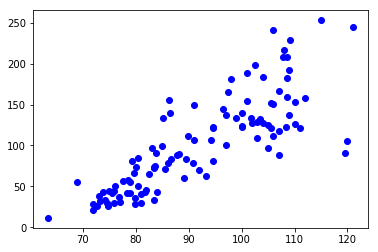

In [78]:
plt.scatter(wcat.Waist,wcat.AT,c="b");plt.plot(wcat.Waist,pred_quad,"r")

Text(0,0.5,'Standardized Residual')

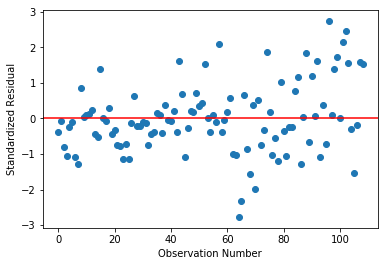

In [79]:
plt.scatter(np.arange(109),model_quad.resid_pearson);plt.axhline(y=0,color='red');plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")

(array([ 2.,  1.,  7., 17., 32., 25.,  8., 10.,  5.,  2.]),
 array([-2.78415636, -2.2312627 , -1.67836904, -1.12547538, -0.57258173,
        -0.01968807,  0.53320559,  1.08609925,  1.6389929 ,  2.19188656,
         2.74478022]),
 <a list of 10 Patch objects>)

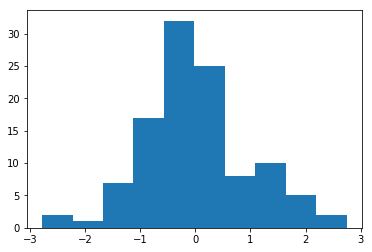

In [80]:
plt.hist(model_quad.resid_pearson) # histogram for residual values 

# Implementing the Linear Regression model from sklearn library

In [83]:
from sklearn.linear_model import LinearRegression
import numpy as np

Text(0.5,0,'waist')

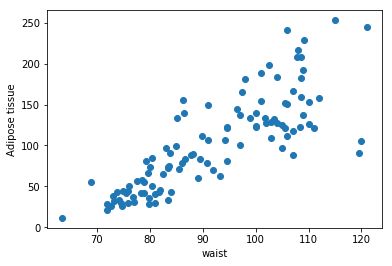

In [126]:
plt.scatter(wcat.Waist,wcat.AT)
plt.ylabel('Adipose tissue') #depandant variable
plt.xlabel('waist') #independent variable

In [127]:
#fitting linear regression model
model1 = LinearRegression()
model1.fit(wcat.Waist.values.reshape(-1,1),wcat.AT) #x = waist; y= AT

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [128]:
#predicting AT values
pred1 = model1.predict(wcat.Waist.values.reshape(-1,1))

In [131]:
pred1

array([ 42.56825159,  35.1317039 ,  66.95321031,  74.389758  ,
        42.22236565,  32.53755936,  63.84023685,  72.48738533,
         3.65608343,  37.20701954,  32.71050233,  43.43296644,
        36.8611336 ,  57.26840401,  50.35068522,  22.16098118,
        46.71888286,  40.49293596,  39.28233517,  46.54593989,
        49.83185632,  63.84023685,  60.38137746,  92.54876981,
        67.64498219, 102.23357611,  83.55573539,  62.4566931 ,
        81.48041975,  69.37441188,  72.83327127,  88.74402448,
        98.08294484,  93.24054169, 136.82217003, 110.88072459,
        98.77471671, 140.28102942,  60.7272634 ,  57.26840401,
        72.83327127,  46.89182583,  62.4566931 ,  83.20984945,
        71.10384158, 154.46235293, 110.18895271, 110.88072459,
        59.68960558,  58.30606183,  94.62408544,  73.87092909,
        78.71333224,  45.16239614,  55.19308837,  55.88486025,
        87.70636666,  82.51807757,  79.75099006,  73.52504315,
        52.42600086,  77.67567442,  60.03549152, 158.61

In [133]:
p1 = pd.DataFrame(pred1)

In [134]:
p1.to_csv('p1.csv', index=False)

In [135]:
# Adjusted R-Squared value
model1.score(wcat.Waist.values.reshape(-1,1),wcat.AT)# 0.6700


0.6700368930528429

In [137]:
rmse1 = np.sqrt(np.mean((pred1-wcat.AT)**2)) # 32.760
rmse1

32.760177495755144

In [138]:
model1.coef_


array([3.45885939])

In [139]:
model1.intercept_

-215.98148796164253

In [140]:
####Predict new values
Waist_test = [[74.75]]

In [141]:
prediction_Waist_test = model1.predict(Waist_test)

In [142]:
prediction_Waist_test

array([42.56825159])

this model did not perform well we should perform transformations in order to make better predictions

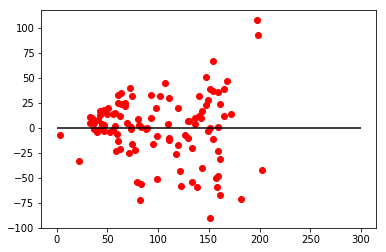

In [145]:
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt
plt.scatter(pred1,(pred1-wcat.AT),c="r")
plt.hlines(y=0,xmin=0,xmax=300) 

(array([ 3.,  8.,  6., 14., 33., 27., 14.,  2.,  0.,  2.]),
 array([-90.34239241, -70.57934363, -50.81629486, -31.05324609,
        -11.29019731,   8.47285146,  28.23590023,  47.99894901,
         67.76199778,  87.52504655, 107.28809533]),
 <a list of 10 Patch objects>)

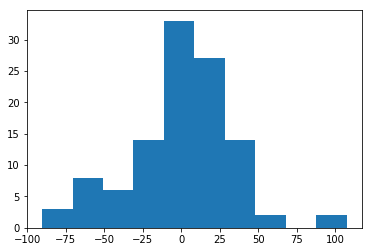

In [146]:
# checking normal distribution for residual
plt.hist(pred1-wcat.AT)

Building Quadratic regression model by transforming X = waist to waist squared 

In [147]:
### Fitting Quadratic Regression 
wcat["Waist_sqrd"] = wcat.Waist*wcat.Waist

In [148]:
model2 = LinearRegression()
model2.fit(X = wcat.iloc[:,[0,2]],y=wcat.AT)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [149]:
pred2 = model2.predict(wcat.iloc[:,[0,2]])

In [150]:
# Adjusted R-Squared value
model2.score(wcat.iloc[:,[0,2]],wcat.AT)# 0.67791

0.6779135963762402

In [151]:
rmse2 = np.sqrt(np.mean((pred2-wcat.AT)**2)) # 32.366
rmse2

32.366798941610874

In [152]:
model2.coef_

array([ 8.97087855, -0.0297003 ])

In [153]:
model2.intercept_

-466.2887065515865

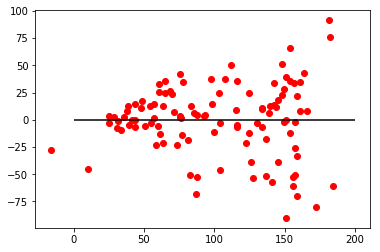

In [154]:
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt
plt.scatter(pred2,(pred2-wcat.AT),c="r")
plt.hlines(y=0,xmin=0,xmax=200)  

(array([ 2.,  5., 10.,  8., 25., 32., 17.,  7.,  1.,  2.]),
 array([-90.08814444, -71.94127667, -53.79440891, -35.64754114,
        -17.50067337,   0.64619439,  18.79306216,  36.93992992,
         55.08679769,  73.23366546,  91.38053322]),
 <a list of 10 Patch objects>)

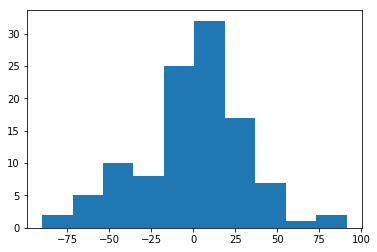

In [155]:
# Checking normal distribution
plt.hist(pred2-wcat.AT)

In [156]:
p2 = pd.DataFrame(pred2)

In [157]:
p2.to_csv('p2.csv', index=False)

In [158]:
import pylab

((array([-2.49269012, -2.16005351, -1.96810538, -1.829376  , -1.71891041,
         -1.62614848, -1.54558238, -1.4739582 , -1.40918581, -1.34983904,
         -1.2948992 , -1.24361202, -1.19540258, -1.14982207, -1.10651298,
         -1.06518563, -1.02560179, -0.98756301, -0.95090206, -0.9154766 ,
         -0.88116436, -0.84785944, -0.81546946, -0.78391323, -0.75311899,
         -0.72302293, -0.69356797, -0.66470285, -0.63638125, -0.60856118,
         -0.58120436, -0.55427579, -0.52774332, -0.5015773 , -0.47575031,
         -0.45023686, -0.42501321, -0.40005714, -0.3753478 , -0.35086557,
         -0.32659187, -0.30250912, -0.27860058, -0.25485026, -0.23124286,
         -0.20776364, -0.18439842, -0.16113345, -0.13795538, -0.1148512 ,
         -0.09180817, -0.06881379, -0.04585574, -0.02292185,  0.        ,
          0.02292185,  0.04585574,  0.06881379,  0.09180817,  0.1148512 ,
          0.13795538,  0.16113345,  0.18439842,  0.20776364,  0.23124286,
          0.25485026,  0.27860058,  0.

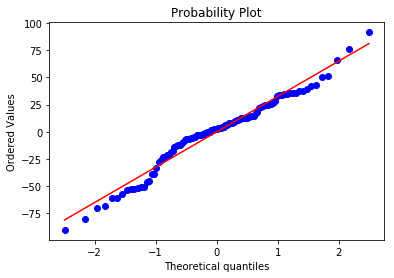

In [159]:
import scipy.stats as st
st.probplot(pred2-wcat.AT,dist="norm",plot=pylab)

In [160]:
#model 3
# Let us prepare a model by applying transformation on dependent variable
wcat["AT_sqrt"] = np.sqrt(wcat.AT)

In [170]:
model3 = LinearRegression()
model3.fit(X = wcat.iloc[:,[0,2]],y=wcat.AT_sqrt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [171]:
pred3 = model3.predict(wcat.iloc[:,[0,2]])

In [172]:
# Adjusted R-Squared value
model3.score(wcat.iloc[:,[0,2]],wcat.AT_sqrt)# 0.74051

0.7405149286499568

In [173]:
rmse3 = np.sqrt(np.mean(((pred3)**2-wcat.AT)**2)) # 32.0507
rmse3

32.05075184594583

In [174]:
model3.coef_

array([ 0.73337404, -0.00298009])

In [175]:
model3.intercept_

-32.0138693571079

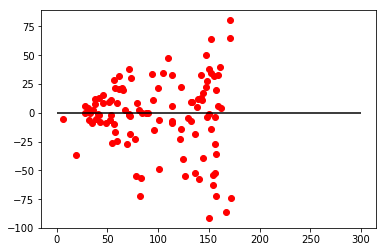

In [176]:
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt
plt.scatter((pred3)**2,((pred3)**2-wcat.AT),c="r")
plt.hlines(y=0,xmin=0,xmax=300)  

(array([ 2.,  5.,  8.,  9., 16., 36., 16., 12.,  2.,  3.]),
 array([-91.19381895, -74.03284217, -56.87186539, -39.71088861,
        -22.54991183,  -5.38893505,  11.77204172,  28.9330185 ,
         46.09399528,  63.25497206,  80.41594884]),
 <a list of 10 Patch objects>)

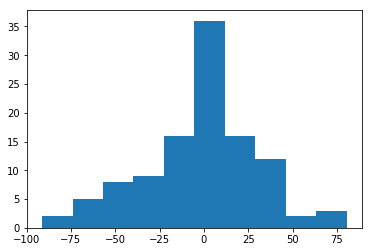

In [177]:
# checking normal distribution for residuals 
plt.hist((pred3)**2-wcat.AT)


((array([-2.49269012, -2.16005351, -1.96810538, -1.829376  , -1.71891041,
         -1.62614848, -1.54558238, -1.4739582 , -1.40918581, -1.34983904,
         -1.2948992 , -1.24361202, -1.19540258, -1.14982207, -1.10651298,
         -1.06518563, -1.02560179, -0.98756301, -0.95090206, -0.9154766 ,
         -0.88116436, -0.84785944, -0.81546946, -0.78391323, -0.75311899,
         -0.72302293, -0.69356797, -0.66470285, -0.63638125, -0.60856118,
         -0.58120436, -0.55427579, -0.52774332, -0.5015773 , -0.47575031,
         -0.45023686, -0.42501321, -0.40005714, -0.3753478 , -0.35086557,
         -0.32659187, -0.30250912, -0.27860058, -0.25485026, -0.23124286,
         -0.20776364, -0.18439842, -0.16113345, -0.13795538, -0.1148512 ,
         -0.09180817, -0.06881379, -0.04585574, -0.02292185,  0.        ,
          0.02292185,  0.04585574,  0.06881379,  0.09180817,  0.1148512 ,
          0.13795538,  0.16113345,  0.18439842,  0.20776364,  0.23124286,
          0.25485026,  0.27860058,  0.

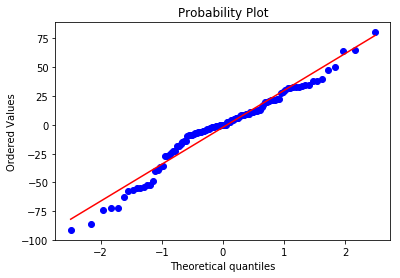

In [178]:
st.probplot((pred3)**2-wcat.AT,dist="norm",plot=pylab)

In [179]:
p3 = pd.DataFrame(pred3)

In [180]:
p3.to_csv('p3.csv', index=False)

In [116]:
# Let us prepare a model by applying transformation on dependent variable without transformation on input variables 
model4 = LinearRegression()
model4.fit(X = wcat.Waist.values.reshape(-1,1),y=wcat.AT_sqrt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [117]:
pred4 = model4.predict(wcat.Waist.values.reshape(-1,1))

In [118]:

# Adjusted R-Squared value
model4.score(wcat.Waist.values.reshape(-1,1),wcat.AT_sqrt)# 0.7096

0.7096086498449352

In [119]:
rmse4 = np.sqrt(np.mean(((pred4)**2-wcat.AT)**2)) # 34.165

In [120]:

model4.coef_

array([0.18030586])

In [121]:


model4.intercept_

-6.898398342272843

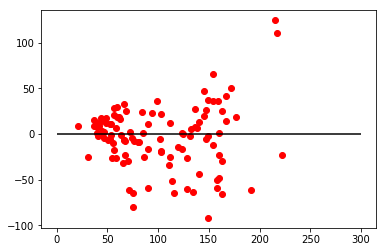

In [122]:
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt
plt.scatter((pred4)**2,((pred4)**2-wcat.AT),c="r")
plt.hlines(y=0,xmin=0,xmax=300)  

((array([-2.49269012, -2.16005351, -1.96810538, -1.829376  , -1.71891041,
         -1.62614848, -1.54558238, -1.4739582 , -1.40918581, -1.34983904,
         -1.2948992 , -1.24361202, -1.19540258, -1.14982207, -1.10651298,
         -1.06518563, -1.02560179, -0.98756301, -0.95090206, -0.9154766 ,
         -0.88116436, -0.84785944, -0.81546946, -0.78391323, -0.75311899,
         -0.72302293, -0.69356797, -0.66470285, -0.63638125, -0.60856118,
         -0.58120436, -0.55427579, -0.52774332, -0.5015773 , -0.47575031,
         -0.45023686, -0.42501321, -0.40005714, -0.3753478 , -0.35086557,
         -0.32659187, -0.30250912, -0.27860058, -0.25485026, -0.23124286,
         -0.20776364, -0.18439842, -0.16113345, -0.13795538, -0.1148512 ,
         -0.09180817, -0.06881379, -0.04585574, -0.02292185,  0.        ,
          0.02292185,  0.04585574,  0.06881379,  0.09180817,  0.1148512 ,
          0.13795538,  0.16113345,  0.18439842,  0.20776364,  0.23124286,
          0.25485026,  0.27860058,  0.

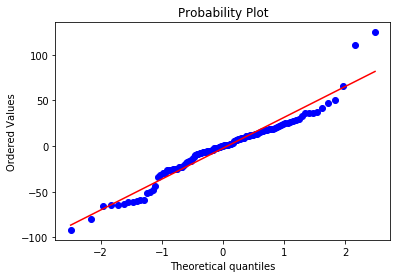

In [123]:
st.probplot((pred4)**2-wcat.AT,dist="norm",plot=pylab)

(array([ 2., 11.,  6., 25., 37., 22.,  3.,  1.,  0.,  2.]),
 array([-91.81765069, -70.16719522, -48.51673975, -26.86628428,
         -5.21582881,  16.43462666,  38.08508212,  59.73553759,
         81.38599306, 103.03644853, 124.686904  ]),
 <a list of 10 Patch objects>)

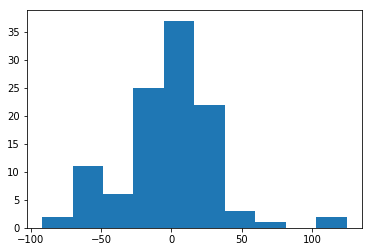

In [124]:
# Checking normal distribution for residuals 
plt.hist((pred4)**2-wcat.AT)

In [ ]:
Other model transformation that can be done to improve predictions of simple linear regression model
